## Testing Julia for GAIA

using the julia language for GAIA analaysis <br>

1. Testing the optimization of the dbscan
2. Testng Affinity propagation


In [2]:
using PyCall
using DataFrames
using Statistics

using Clustering 
using Statistics
using Distances

push!(LOAD_PATH,"/home/stephane/Science/cluster/GAIA/master/src")
using gaiaClustering

import PyPlot; const plt = PyPlot

@pyimport astropy.io.votable as votable
# @pyimport matplotlib.pyplot as plt

## directory
rootdir = "/home/stephane/Science/cluster/GAIA"
wdir    = "/home/stephane/Science/cluster/GAIA/products"

cd(wdir)

In [3]:
## Main program

voname = "test.vot"

data       = read_votable(voname)
df         = filter_data(data)
dfcart     = add_cartesian(df)
blck       = [[1,2,3],[4,5], [6,7,8]]
wghtblck   = [5.0,8.0,1.0]
norm       = "identity"

dfcartnorm , scale8 = normalization_PerBlock(dfcart, blck, wghtblck , norm, false) 

## Votable test.vot read
## Filtering done ...
## Stars selected: 12531
## Cartesian transformation done ...
## Normalization identity done...
### [1pc,1pc,1pc,1km/s,1km/s,1mag,1mag] equivalent to [0.348367, 0.348367, 0.348367, 0.557386, 0.557386, 0.0696733, 0.0696733, 0.0696733]


(gaiaClustering.Df(12531, [308.064 127.235 … 272.531 263.879; -9.58745 -3.91012 … 1.39183 1.16721; … ; 0.0509423 0.0766101 … 0.0583662 0.0945121; 0.0437381 0.0833939 … 0.0432674 0.0325398], [277.32 277.342 … 279.395 279.356; -33.2627 -33.2783 … -34.812 -34.8646; … ; 15.3938 16.2834 … 15.68 17.1638; 16.7528 18.5798 … 17.1387 18.9873], [0.0347643 0.0777114 … 0.0538083 0.208771; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]), [0.348367, 0.348367, 0.348367, 0.557386, 0.557386, 0.0696733, 0.0696733, 0.0696733])

In [8]:
## Clustering ..
println("## Starting Clustering ...")


###########################3
eps = 4.5

println("ϵ : $eps")

dftemp = copy1(dfcartnorm)

println("## dbscan..")
res1 = dbscan(dftemp.data , eps , leafsize=20, min_neighbors=10, min_cluster_size=25)
println("### done ...")

println("## Ward")
d = pairwise(Euclidean(), dftemp.data, dftemp.data)
res = hclust(d)
println("### done ...")

# println(res.order)
# println(res.heights)

ind = findall( x -> x < 1.0, res.heights)

indx = res.order[ind]
println(length(indx))

i = 1
for cl in res1
    println("i : $i")
    i += 1
    indx1 = cl.core_indices
    append!(indx1, cl.boundary_indices) 
    println(length(indx1))
    mean1 = mean(dfcart.data[1,indx1])
    lgal1 = mean(df.data[1,indx1])
    bgal1 = mean(df.data[2,indx1])
    println("Mean: $mean1")
    println("lgal : $lgal1")
    println("bgal : $bgal1")
end
indx = res1[1].core_indices
append!(indx, res1[1].boundary_indices)   

sdb = length(res1)
println("Number of dbscan cluster $sdb")

# indx = find1(res , 8)



## Starting Clustering ...
ϵ : 4.5
## dbscan..
### done ...
## Ward
### done ...
64
i : 1
128
Mean: 160.21290918900456
lgal : 279.65219834686064
bgal : -33.51675472758331
i : 2
183
Mean: 421.4880488608966
lgal : 278.88514247850645
bgal : -33.52614200827973
i : 3
52
Mean: 459.0244024855391
lgal : 280.0009961748503
bgal : -33.216251754932514
i : 4
120
Mean: 257.02847301518347
lgal : 279.69180512722033
bgal : -33.462332983107075
i : 5
87
Mean: 255.43880684132182
lgal : 279.52509405324037
bgal : -33.554304681305624
i : 6
123
Mean: 316.90003366418557
lgal : 279.43749410622166
bgal : -33.34827804286007
i : 7
29
Mean: 354.62844842602686
lgal : 280.171619611273
bgal : -33.33347525949064
Number of dbscan cluster 7


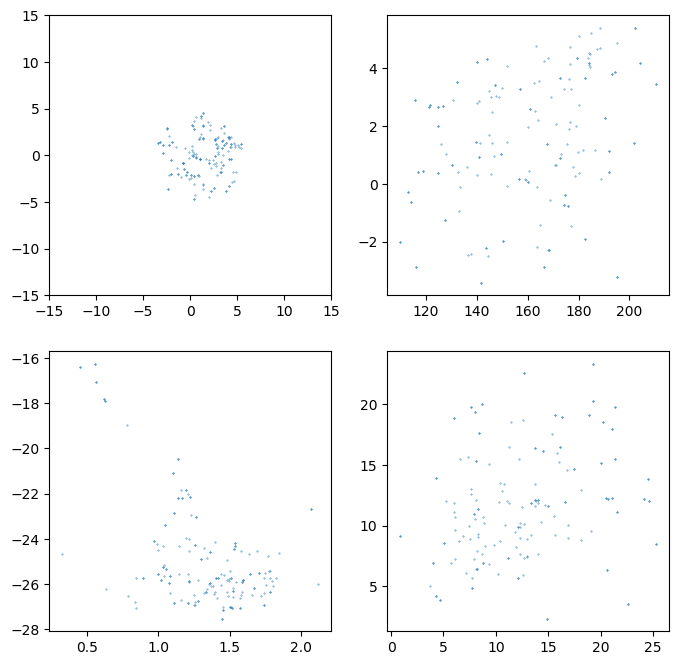

In [9]:
plt.figure(figsize=(8.0,8.0))

plt.subplot(2, 2, 1 , xlim = [-15,15], ylim = [-15,15])
x = dfcart.data[2,indx]
y = dfcart.data[3,indx]
plt.scatter(x, y , s = 0.1 )

plt.subplot(2, 2, 2)
x = dfcart.data[1,indx]
y = dfcart.data[2,indx]
plt.scatter(x, y , s = 0.1 )

plt.subplot(2, 2, 3)
x = dfcart.data[7,indx]
y = -dfcart.data[6,indx]
plt.scatter(x, y , s = 0.1 )

plt.subplot(2, 2, 4)
x = dfcart.data[4,indx]
y = -dfcart.data[5,indx]
plt.scatter(x, y , s = 0.1 )


plt.show()